In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import warnings
warnings.simplefilter('ignore')


## 답러닝 쪽은 워낙 오버피팅이 많이 일어나서 디폴트로 검정데이터를 나누고 validation_fraction=0.1 오버피팅을 확인한다!
## 과적합이 일어난 시점에 멈추는 early_stopping=True 을 하는게 중요!!

In [3]:
df = pd.read_csv( '../data5/pima-indians-diabetes.data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x_data = df.iloc[:,:-1]
y_data = df['Outcome']

In [5]:
x_train, x_test, y_train, y_test = train_test_split( x_data,y_data,test_size=0.3,stratify=y_data)

In [6]:
m_pip = make_pipeline( StandardScaler(), 
                    MLPClassifier(early_stopping=True) )
m_pip.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier(early_stopping=True))])

In [7]:
# 파이프라인 단계 중 하나의 속성을 확인하고 싶을 때
# 단계이름을 키로 가진 named_steps 함수를 사용

m_pip.named_steps['mlpclassifier'].loss_curve_

[0.683275888564093,
 0.6636913402623191,
 0.6449237232166962,
 0.6291798320716754,
 0.6151269675975538,
 0.6012710297020298,
 0.5897804424823225,
 0.5784597664354378,
 0.5690648576617938,
 0.5599338931108234,
 0.5520431040980752,
 0.5448842789184745,
 0.5381980279695804,
 0.5319890865786852,
 0.5264303298666525,
 0.5214083496587707,
 0.5165503629150527,
 0.5120802678706218,
 0.5083119034503208,
 0.5042964302840538,
 0.50119579203722,
 0.49752390868732954]

In [8]:
m_pip.named_steps['mlpclassifier'].validation_scores_

[0.6111111111111112,
 0.6296296296296297,
 0.6296296296296297,
 0.6296296296296297,
 0.6851851851851852,
 0.7407407407407407,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7962962962962963,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8148148148148148,
 0.8148148148148148,
 0.8148148148148148,
 0.8148148148148148,
 0.8148148148148148]

In [9]:
m_pip= MLPClassifier(early_stopping=True, verbose=1)
m_pip.fit(x_train, y_train)

Iteration 1, loss = 7.38664696
Validation score: 0.574074
Iteration 2, loss = 6.07056023
Validation score: 0.555556
Iteration 3, loss = 4.75446725
Validation score: 0.574074
Iteration 4, loss = 3.34585391
Validation score: 0.592593
Iteration 5, loss = 1.97636961
Validation score: 0.555556
Iteration 6, loss = 1.27952454
Validation score: 0.518519
Iteration 7, loss = 1.35361616
Validation score: 0.537037
Iteration 8, loss = 1.68738828
Validation score: 0.537037
Iteration 9, loss = 1.50623743
Validation score: 0.555556
Iteration 10, loss = 1.10249967
Validation score: 0.537037
Iteration 11, loss = 0.86663721
Validation score: 0.666667
Iteration 12, loss = 0.95072545
Validation score: 0.629630
Iteration 13, loss = 0.94482331
Validation score: 0.629630
Iteration 14, loss = 0.86301628
Validation score: 0.722222
Iteration 15, loss = 0.75798564
Validation score: 0.629630
Iteration 16, loss = 0.79310833
Validation score: 0.666667
Iteration 17, loss = 0.76635456
Validation score: 0.703704
Iterat

MLPClassifier(early_stopping=True, verbose=1)

In [10]:
m_pip.loss_curve_

[7.3866469597357645,
 6.070560228132723,
 4.7544672495383,
 3.3458539096991076,
 1.9763696128845634,
 1.2795245432182871,
 1.3536161607764754,
 1.687388280565074,
 1.5062374292107077,
 1.1024996656040789,
 0.8666372103047519,
 0.9507254465676155,
 0.9448233109375165,
 0.8630162795228301,
 0.757985637996658,
 0.7931083251770753,
 0.7663545606334431,
 0.714052843624609,
 0.7035536519575051,
 0.6953028935352451,
 0.6673198668732214,
 0.6525747007520232,
 0.650655443381632,
 0.6300837974922006,
 0.6230266580142938,
 0.6179360251170585,
 0.6030958923461682,
 0.598577705083585,
 0.5896838054487216,
 0.5820036839477473,
 0.5869557720943431,
 0.5797819468633609]

In [11]:
m_pip.validation_scores_

[0.5740740740740741,
 0.5555555555555556,
 0.5740740740740741,
 0.5925925925925926,
 0.5555555555555556,
 0.5185185185185185,
 0.5370370370370371,
 0.5370370370370371,
 0.5555555555555556,
 0.5370370370370371,
 0.6666666666666666,
 0.6296296296296297,
 0.6296296296296297,
 0.7222222222222222,
 0.6296296296296297,
 0.6666666666666666,
 0.7037037037037037,
 0.6666666666666666,
 0.6296296296296297,
 0.7037037037037037,
 0.7592592592592593,
 0.7222222222222222,
 0.6851851851851852,
 0.6851851851851852,
 0.6851851851851852,
 0.6481481481481481,
 0.7037037037037037,
 0.7037037037037037,
 0.6666666666666666,
 0.6111111111111112,
 0.6851851851851852,
 0.6851851851851852]

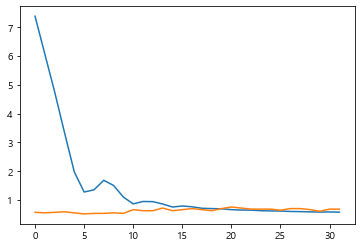

In [12]:
plt.plot( m_pip.loss_curve_ )
plt.plot(m_pip.validation_scores_ )
plt.show()